<a href="https://colab.research.google.com/github/kurek0010/Predicting_Movie_Revenues/blob/main/protection_movie_revenues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("movies.csv")
df

,title,main_genre,belongs_to_collection,budget,revenue,production_companies,vote_average,popularity,runtime,cast_size,crew_size,cast_tr,director_tr,production_company_tr,English,title_length,rel_year,rel_month
0,Central Station,Drama,False,2.9,5.596708,3.0,7.6,4.919716,113.0,19,43,0.000000,0.000000,0.000000,False,14,1998,January
1,Hard Rain,Thriller,False,70.0,19.870567,9.0,5.5,6.363405,97.0,10,82,2361.750386,12.890752,14585.748889,True,8,1998,January
2,Half Baked,Comedy,False,8.0,17.460020,1.0,6.4,7.022548,82.0,12,8,119.943461,44.442512,13181.546450,True,9,1998,January
3,Great Expectations,Comedy,False,25.0,55.494066,2.0,6.4,9.941228,111.0,10,6,726.339145,0.000000,10393.573468,True,17,1998,January
4,Buffalo '66,Romance,False,1.5,2.375097,NaN,7.2,9.167761,110.0,26,13,366.582721,0.000000,NaN,True,10,1998,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,Atomic Blonde,Action,False,30.0,90.007945,5.0,6.1,14.455104,115.0,23,96,5208.358646,0.000000,0.208588,True,12,2017,July
3662,The Emoji Movie,Comedy,False,50.0,66.913939,2.0,5.8,33.694599,86.0,33,46,2120.117991,30.000000,31840.881695,True,13,2017,July
3663,The Dark Tower,Action,False,60.0,71.000000,4.0,5.7,50.903593,95.0,50,199,3767.974906,7.594693,4528.739344,True,12,2017,August
3664,Wind River,Action,False,11.0,184.770205,3.0,7.4,40.796775,111.0,22,18,2159.066587,0.000000,171.539887,True,9,2017,August


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3666 entries, 0 to 3665
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  3666 non-null   object 
 1   main_genre             3658 non-null   object 
 2   belongs_to_collection  3666 non-null   bool   
 3   budget                 3666 non-null   float64
 4   revenue                3666 non-null   float64
 5   production_companies   3521 non-null   float64
 6   vote_average           3662 non-null   float64
 7   popularity             3666 non-null   float64
 8   runtime                3654 non-null   float64
 9   cast_size              3666 non-null   int64  
 10  crew_size              3666 non-null   int64  
 11  cast_tr                3657 non-null   float64
 12  director_tr            3661 non-null   float64
 13  production_company_tr  3521 non-null   float64
 14  English                3666 non-null   bool   
 15  titl

In [7]:
df.describe()

,budget,revenue,production_companies,vote_average,popularity,runtime,cast_size,crew_size,cast_tr,director_tr,production_company_tr,title_length,rel_year
count,3666.000000,3666.000000,3521.000000,3662.000000,3666.000000,3654.000000,3666.000000,3666.000000,3657.000000,3661.000000,3521.000000,3666.000000,3666.000000
mean,37.967148,105.421380,3.513206,6.213053,10.458992,109.718664,24.468631,33.419531,1894.761487,290.398374,5726.472446,13.135843,2008.168031
std,45.120849,185.822130,2.332797,0.865616,16.089384,20.448749,21.002806,36.928229,2341.460368,708.296750,9916.842612,6.884674,5.330202
min,0.000001,0.000001,1.000000,1.000000,0.001880,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
25%,8.000000,8.006743,2.000000,5.700000,5.858285,95.000000,13.000000,10.000000,130.577558,0.000000,0.173066,9.000000,2004.000000
50%,21.000000,38.029167,3.000000,6.200000,8.718403,106.000000,18.000000,19.000000,991.792599,17.496992,357.182732,12.000000,2009.000000
75%,50.000000,116.463053,5.000000,6.800000,12.114949,120.000000,28.000000,44.000000,2819.038392,262.598896,6396.978333,16.000000,2013.000000
max,380.000000,2787.965087,26.000000,9.000000,547.488298,338.000000,224.000000,435.000000,20450.834225,9073.275833,46180.723661,72.000000,2017.000000


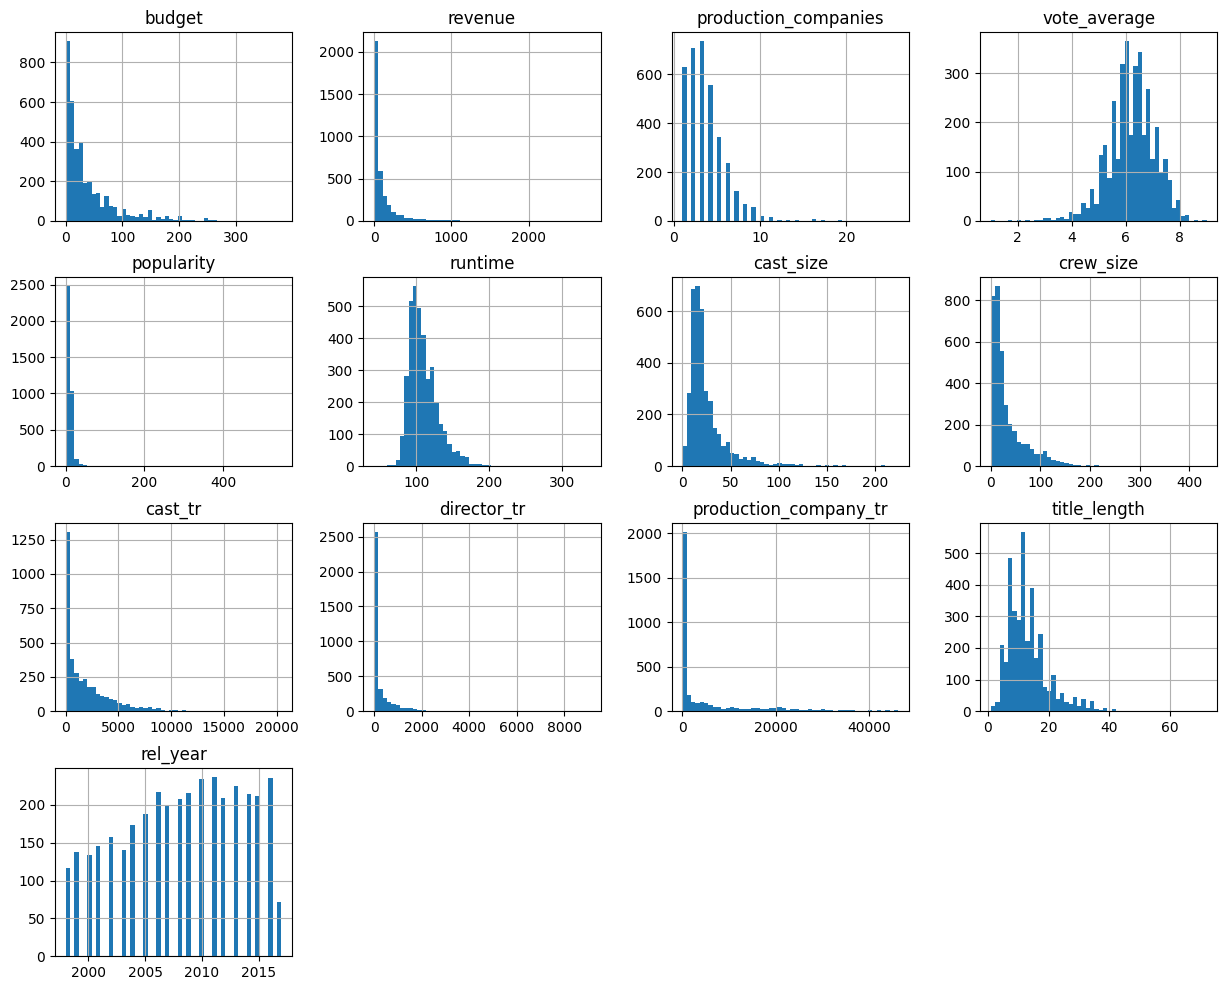

In [8]:
df.hist(figsize = (15, 12), bins = 50)
plt.show()

In [10]:
df.drop(columns = "title", inplace = True)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_set, test_set = train_test_split(df, test_size = 0.25, shuffle = True, random_state = 42)

In [13]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2749 entries, 3325 to 3174
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   main_genre             2744 non-null   object 
 1   belongs_to_collection  2749 non-null   bool   
 2   budget                 2749 non-null   float64
 3   revenue                2749 non-null   float64
 4   production_companies   2633 non-null   float64
 5   vote_average           2745 non-null   float64
 6   popularity             2749 non-null   float64
 7   runtime                2739 non-null   float64
 8   cast_size              2749 non-null   int64  
 9   crew_size              2749 non-null   int64  
 10  cast_tr                2741 non-null   float64
 11  director_tr            2745 non-null   float64
 12  production_company_tr  2633 non-null   float64
 13  English                2749 non-null   bool   
 14  title_length           2749 non-null   int64  
 15  rel_ye

In [14]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 1960 to 2822
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   main_genre             914 non-null    object 
 1   belongs_to_collection  917 non-null    bool   
 2   budget                 917 non-null    float64
 3   revenue                917 non-null    float64
 4   production_companies   888 non-null    float64
 5   vote_average           917 non-null    float64
 6   popularity             917 non-null    float64
 7   runtime                915 non-null    float64
 8   cast_size              917 non-null    int64  
 9   crew_size              917 non-null    int64  
 10  cast_tr                916 non-null    float64
 11  director_tr            916 non-null    float64
 12  production_company_tr  888 non-null    float64
 13  English                917 non-null    bool   
 14  title_length           917 non-null    int64  
 15  rel_yea

In [17]:
# Select only numeric columns before calculating correlations
numeric_columns = train_set.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

In [18]:
import seaborn as sns

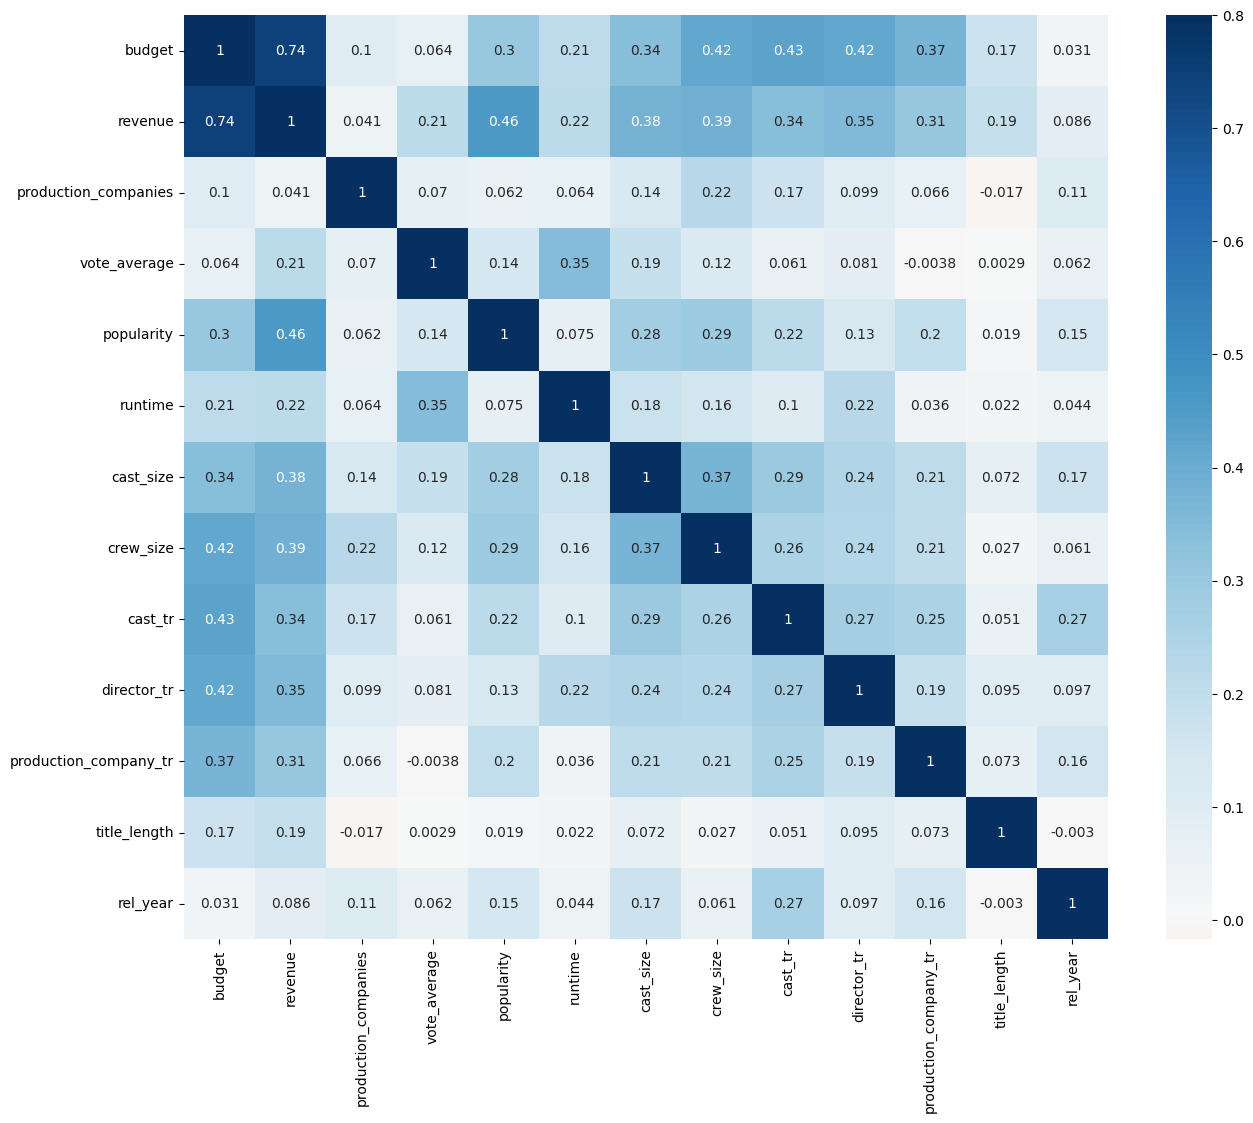

In [19]:
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, square = True, annot = True, cmap = "RdBu", center = 0, vmax = 0.8)
plt.show()

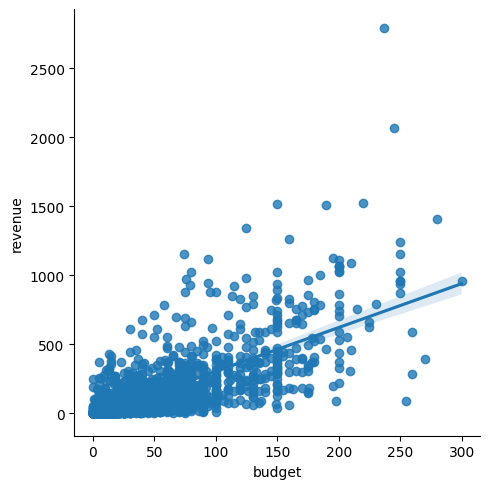

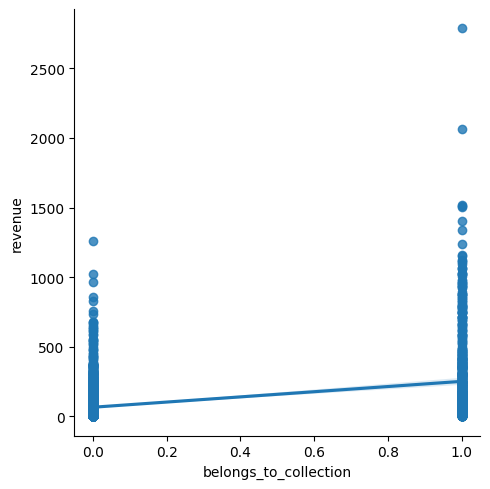

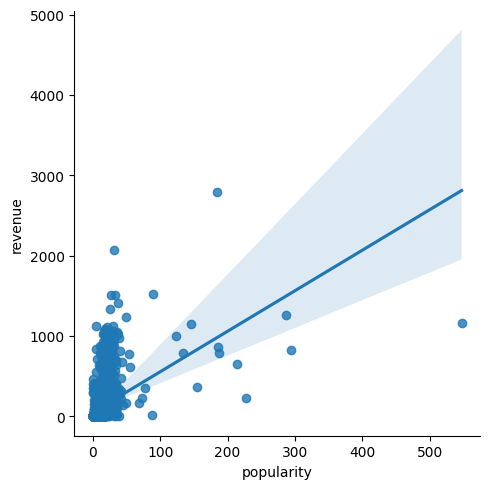

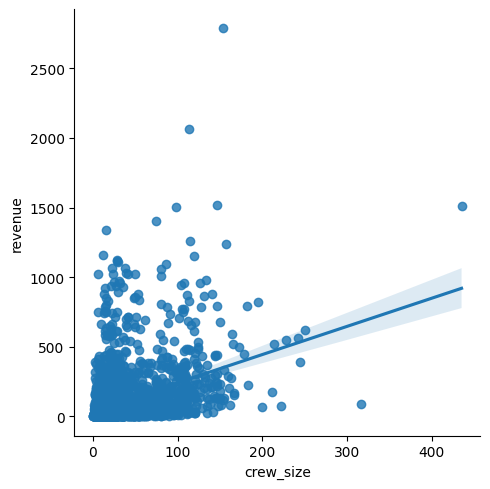

In [20]:
features = ["budget", "belongs_to_collection", "popularity", "crew_size"]
for i in features:
    sns.lmplot(x = i, y = "revenue", data = train_set)
    plt.show()

In [21]:
categoricals = train_set.select_dtypes(exclude=np.number).columns.tolist()
categoricals

['main_genre', 'belongs_to_collection', 'English', 'rel_month']

In [23]:
categoricals.append("rel_year")
categoricals

['main_genre',
 'belongs_to_collection',
 'English',
 'rel_month',
 'rel_year',
 'rel_year']

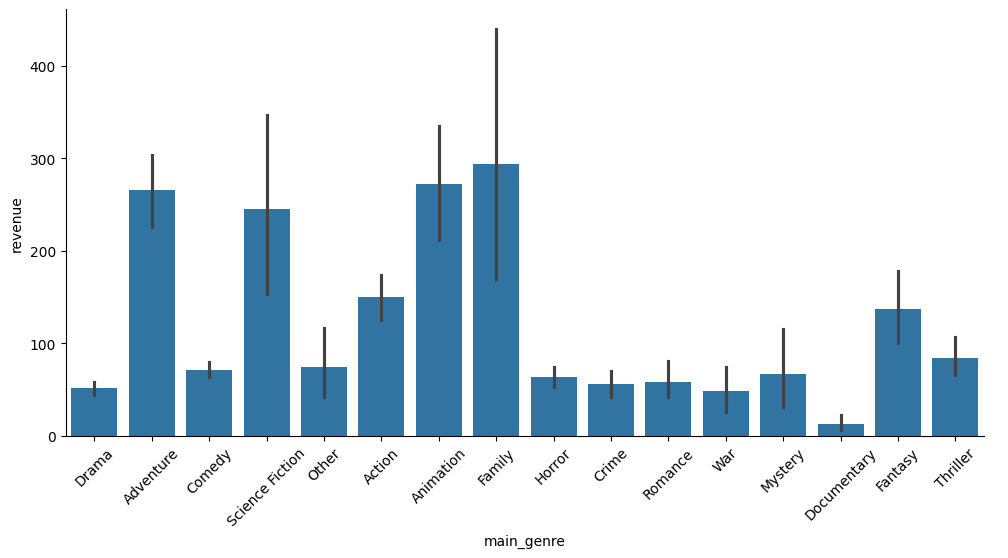

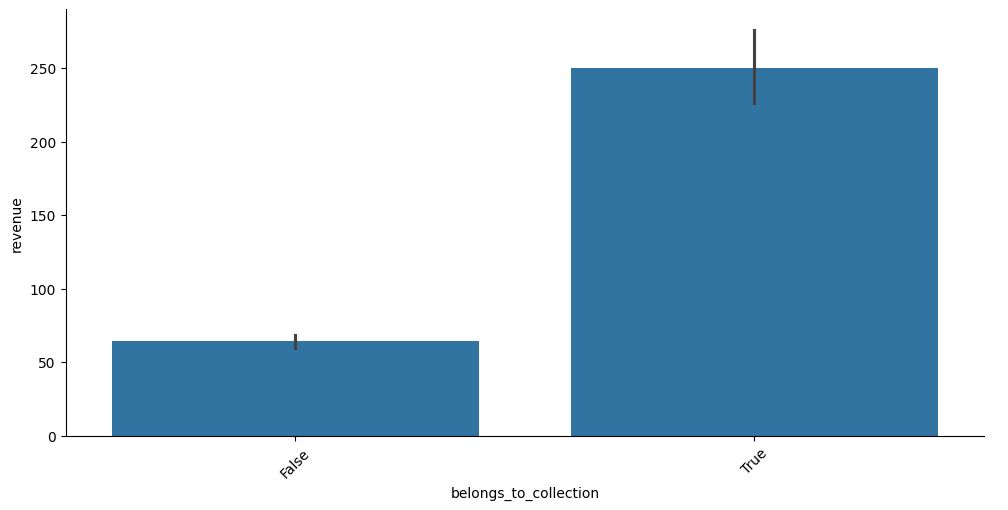

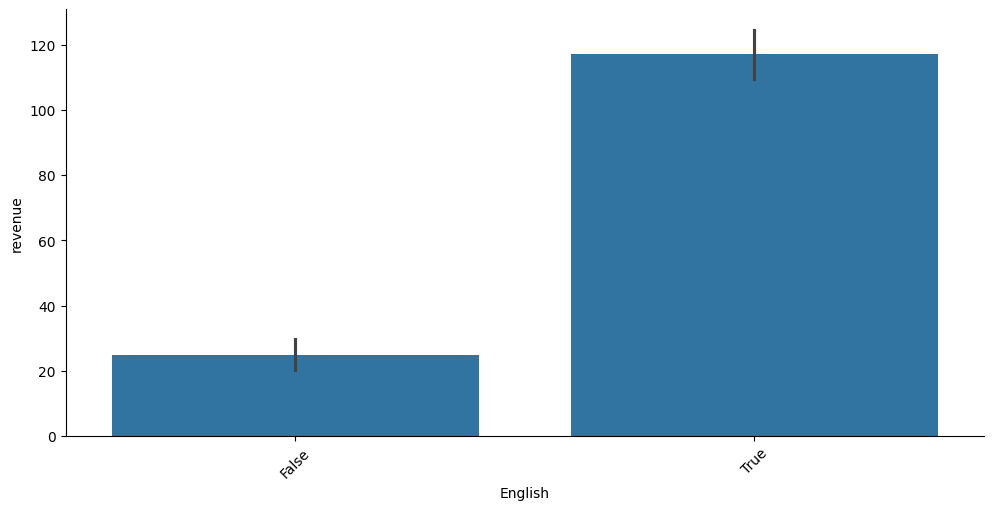

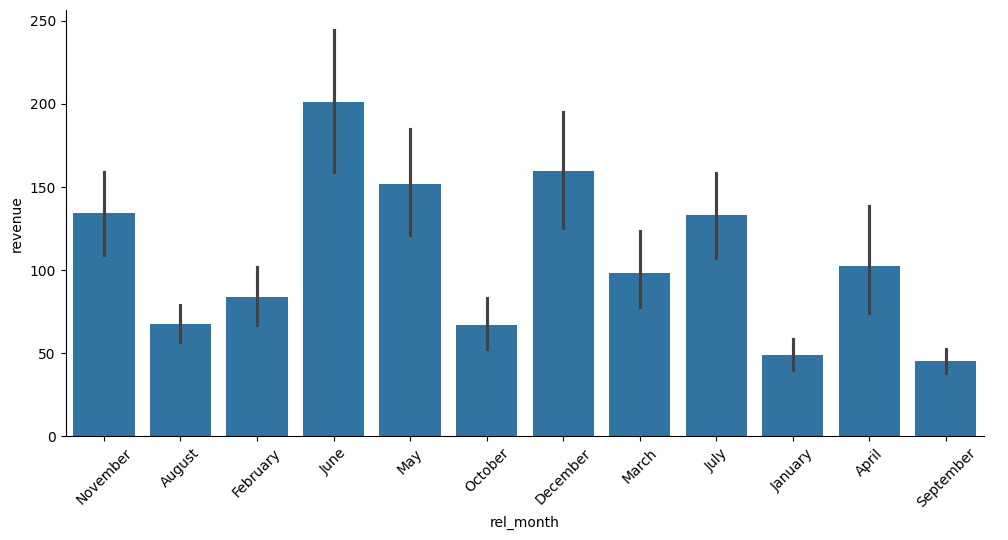

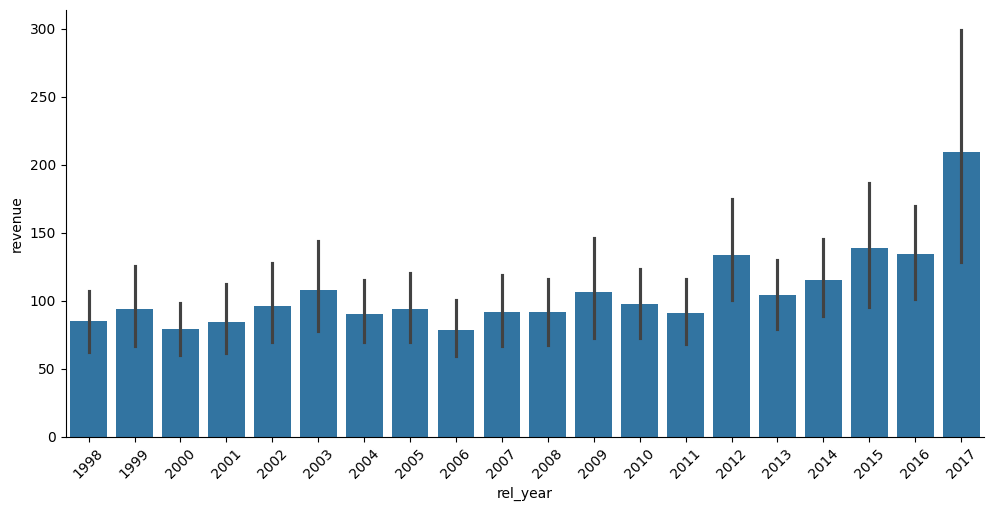

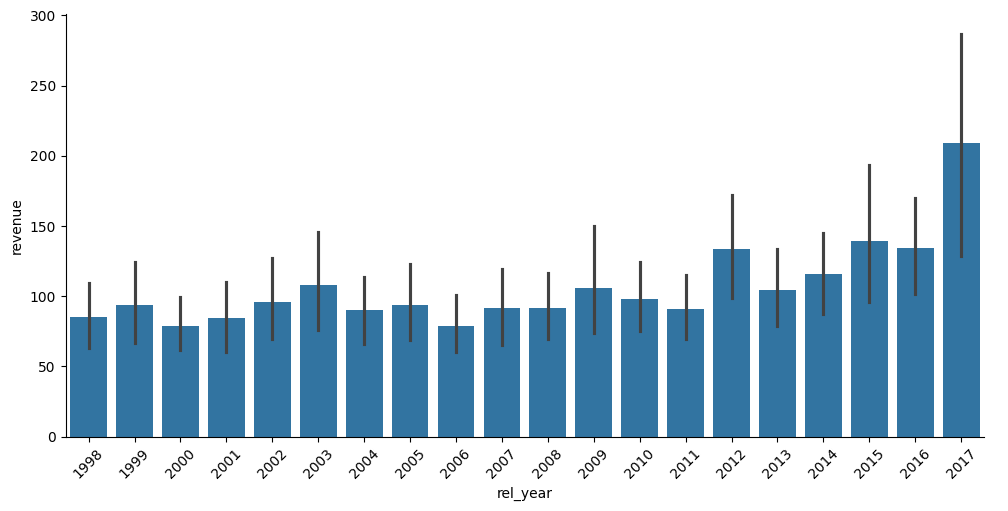

In [24]:
for cat in categoricals:
    sns.catplot(x = cat, y = "revenue", data = train_set, kind = "bar", aspect = 2)
    plt.xticks(rotation=45)
    plt.show()

In [25]:
target = "revenue"

In [26]:
features = train_set.drop(columns = [target]).columns.to_list()
features

['main_genre',
 'belongs_to_collection',
 'budget',
 'production_companies',
 'vote_average',
 'popularity',
 'runtime',
 'cast_size',
 'crew_size',
 'cast_tr',
 'director_tr',
 'production_company_tr',
 'English',
 'title_length',
 'rel_year',
 'rel_month']

In [27]:
X_train = train_set[features].copy()
y_train = train_set[target].copy()
X_test = test_set[features].copy()
y_test = test_set[target].copy()

In [28]:
numeric_feat=list(X_train.select_dtypes(include = np.number).columns)
numeric_feat

['budget',
 'production_companies',
 'vote_average',
 'popularity',
 'runtime',
 'cast_size',
 'crew_size',
 'cast_tr',
 'director_tr',
 'production_company_tr',
 'title_length',
 'rel_year']

In [29]:
text_feat = list(X_train.select_dtypes(include = "object").columns)
text_feat

['main_genre', 'rel_month']

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [31]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", RobustScaler())
])

In [32]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("encoder", OneHotEncoder())
])

In [33]:
preprocessor = ColumnTransformer(transformers=
                                 [('num',num_pipeline, numeric_feat),
                                  ('cat', cat_pipeline, text_feat)
                                 ], remainder = "passthrough"
                                )


In [34]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['budget', 'production_companies',
                                  'vote_average', 'popularity', 'runtime',
                                  'cast_size', 'crew_size', 'cast_tr',
                                  'director_tr', 'production_company_tr',
                                  'title_length', 'rel_year']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 ['main_genre', 'rel_month'])])

In [35]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state = 42, tree_method = "hist")

In [36]:
regressor = Pipeline(steps=
                     [("preprocessor", preprocessor),
                      ("model", model)
                     ])

In [37]:
regressor

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['budget',
                                                   'production_companies',
                                                   'vote_average', 'popularity',
                                                   'runtime', 'cast_size',
                                                   'crew_size', 'cast_tr',
                                                   'director_tr',
                                                   'production_company_tr',
                                                   'title_length',
                                                   'rel_yea...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [38]:
regressor.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', RobustScaler())]),
                                    ['budget', 'production_companies',
                                     'vote_average', 'popularity', 'runtime',
                                     'cast_size', 'crew_size', 'cast_tr',
                                     'director_tr', 'production_company_tr',
                                     'title_length', 'rel_year']),
                                   ('cat',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder',

In [39]:
param_grid = [{"model__max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
               "model__n_estimators": [100, 150, 200],
               "model__learning_rate": [0.01, 0.03, 0.05, 0.07, 0.09, 0.11],
               "model__colsample_bytree": [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
               "model__subsample": [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
               "model__min_child_weight": [1, 3, 5, 7, 9, 11, 13],
               "model__gamma": [0, 1, 2, 3, 4, 5],
               "model__reg_alpha": [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
               "model__reg_lambda": [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
              }]

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
n_iter = 60
n_jobs = -1
scores = ["neg_root_mean_squared_error", "r2"]
refit = "neg_root_mean_squared_error"
random_state = 42

In [44]:
rscv = RandomizedSearchCV(estimator = regressor,
                          param_distributions = param_grid,
                          n_iter = n_iter,
                          n_jobs = n_jobs,
                          scoring = scores,
                          refit = refit,
                          random_state = random_state)


In [45]:
rscv.fit(X = X_train, y = y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['budget',
                                                                                'production_companies',
                                                                                'vote_average',
                                                                                'popularity',
                                                                                'runtime',
                                                                                'cast_size',
                                                                                'crew_size',
                                                                                'cast_tr',
                                                                                'director_tr',
                                                                                'production_compan...
                                         'model__max_depth': [3, 4, 5, 6, 7, 8,
                                                              9, 10],
                                         'model__min_child_weight': [1, 3, 5, 7,
                                                                     9, 11,
                                                                     13],
                                         'model__n_estimators': [100, 150, 200],
                                         'model__reg_alpha': [0, 0.1, 0.3, 0.5,
                                                              0.7, 0.9, 1],
                                         'model__reg_lambda': [0, 0.1, 0.3, 0.5,
                                                               0.7, 0.9, 1],
                                         'model__subsample': [0.3, 0.5, 0.6,
                                                              0.7, 0.8, 0.9,
                                                              1]}],
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error', 'r2'])

In [46]:
rscv.best_params_

{'model__subsample': 0.9,
 'model__reg_lambda': 0.3,
 'model__reg_alpha': 0.7,
 'model__n_estimators': 200,
 'model__min_child_weight': 5,
 'model__max_depth': 9,
 'model__learning_rate': 0.03,
 'model__gamma': 4,
 'model__colsample_bytree': 0.8}

In [47]:
rscv.best_score_

-95.32074186034656

In [48]:
cv_results = pd.DataFrame(rscv.cv_results_)[["params",
                                            "mean_test_neg_root_mean_squared_error",
                                            "mean_test_r2",
                                            "rank_test_neg_root_mean_squared_error",
                                            "rank_test_r2"]]


In [49]:
cv_results = cv_results.sort_values("mean_test_neg_root_mean_squared_error", ascending=False)
cv_results

,params,mean_test_neg_root_mean_squared_error,mean_test_r2,rank_test_neg_root_mean_squared_error,rank_test_r2
24,"{'model__subsample': 0.9, 'model__reg_lambda':...",-95.320742,0.748454,1,2
33,"{'model__subsample': 0.6, 'model__reg_lambda':...",-95.337598,0.748893,2,1
7,"{'model__subsample': 1, 'model__reg_lambda': 0...",-95.486672,0.747460,3,3
52,"{'model__subsample': 1, 'model__reg_lambda': 0...",-96.179999,0.744072,4,4
34,"{'model__subsample': 0.3, 'model__reg_lambda':...",-96.289290,0.743485,5,5
32,"{'model__subsample': 0.9, 'model__reg_lambda':...",-96.293978,0.743382,6,6
43,"{'model__subsample': 0.9, 'model__reg_lambda':...",-96.381390,0.742663,7,7
19,"{'model__subsample': 0.7, 'model__reg_lambda':...",-96.946857,0.739872,8,8
56,"{'model__subsample': 0.8, 'model__reg_lambda':...",-96.980194,0.738830,9,9
36,"{'model__subsample': 1, 'model__reg_lambda': 0...",-97.126262,0.738076,10,13


In [50]:
rscv.best_estimator_[1]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=4, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [51]:
pred = rscv.predict(X_test)

In [53]:
from sklearn import metrics

In [54]:
metrics.mean_squared_error(y_true = y_test, y_pred = pred, squared = False)

90.13822121219937

In [55]:
metrics.r2_score(y_true = y_test, y_pred = pred)

0.7204256168592404